In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
692,ham,"My sister in law, hope you are having a great ...",NaN,NaN,NaN
3891,spam,URGENT This is our 2nd attempt to contact U. Y...,NaN,NaN,NaN
1478,ham,I think its far more than that but find out. C...,NaN,NaN,NaN
3383,spam,FREE MSG:We billed your mobile number by mista...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#Steps:
# Data Cleaning
# EDA
# text preprocessing
# model building
# evaluation
# improvement 
# website
# deploy

#
Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
df.sample(5)

,v1,v2
1150,ham,(That said can you text him one more time?)
3146,ham,Oh thats late! Well have a good night and i wi...
1458,ham,"Fighting with the world is easy, u either win ..."
5062,ham,Ok i also wan 2 watch e 9 pm show...
4102,spam,U have a secret admirer who is looking 2 make ...


In [10]:
df.rename(columns = {'v1':'target','v2':'text'}, inplace=True)

In [11]:
df.sample(5)

,target,text
4518,ham,Just got part Nottingham - 3 hrs 63miles. Good...
1760,ham,Nt yet chikku..simple habba..hw abt u?
3391,ham,What r u cooking me for dinner?
2771,ham,Then ur sis how?
5315,ham,Hahaha..use your brain dear


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [16]:
df.sample(5)

,target,text
4753,0,Ok lor... Or u wan me go look 4 u?
2900,1,Ur cash-balance is currently 500 pounds - to m...
1867,0,Mmmm ... Fuck ... Not fair ! You know my weakn...
615,0,"\Happy valentines day\"" I know its early but i..."
1540,0,K come to nordstrom when you're done


In [17]:
df.shape

(5169, 2)

#
EDA

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vigne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

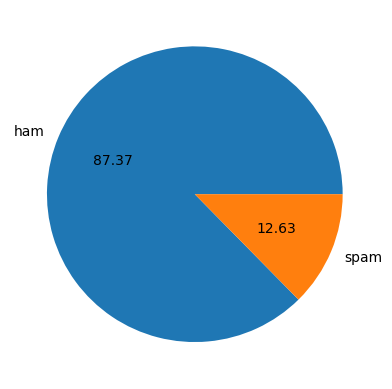

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [24]:
df['num_characters']=df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentences']=df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

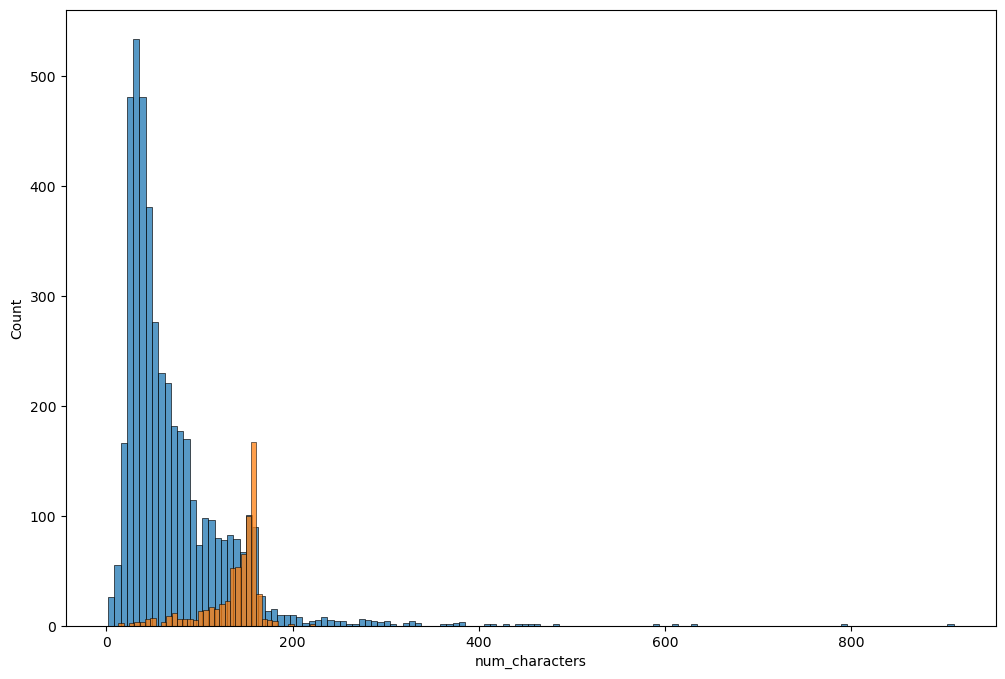

In [32]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

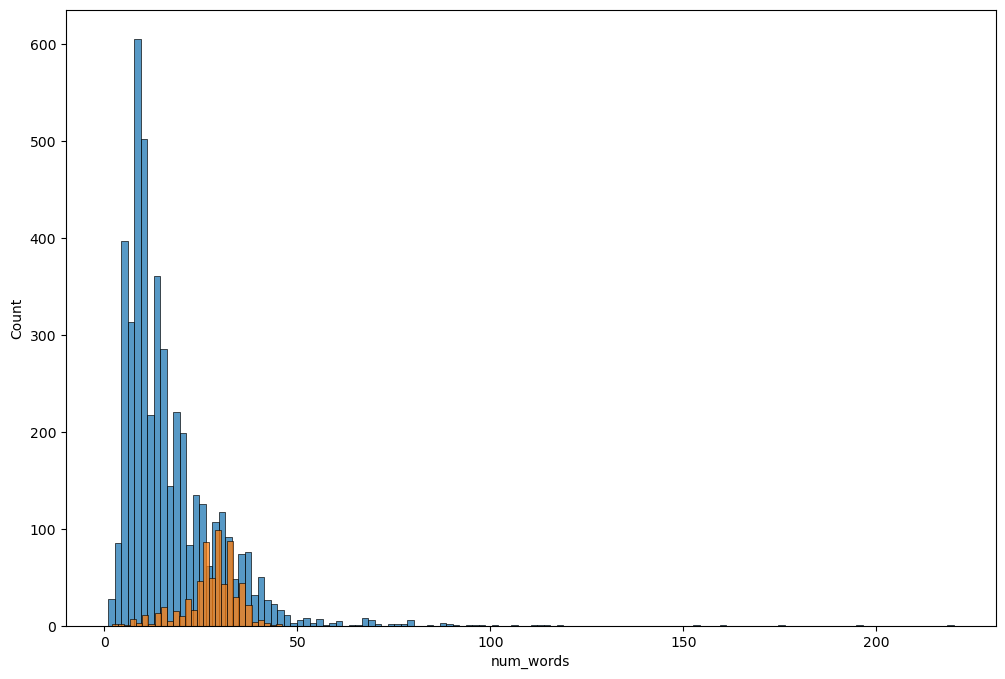

In [33]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'])

<Axes: xlabel='num_words', ylabel='Count'>

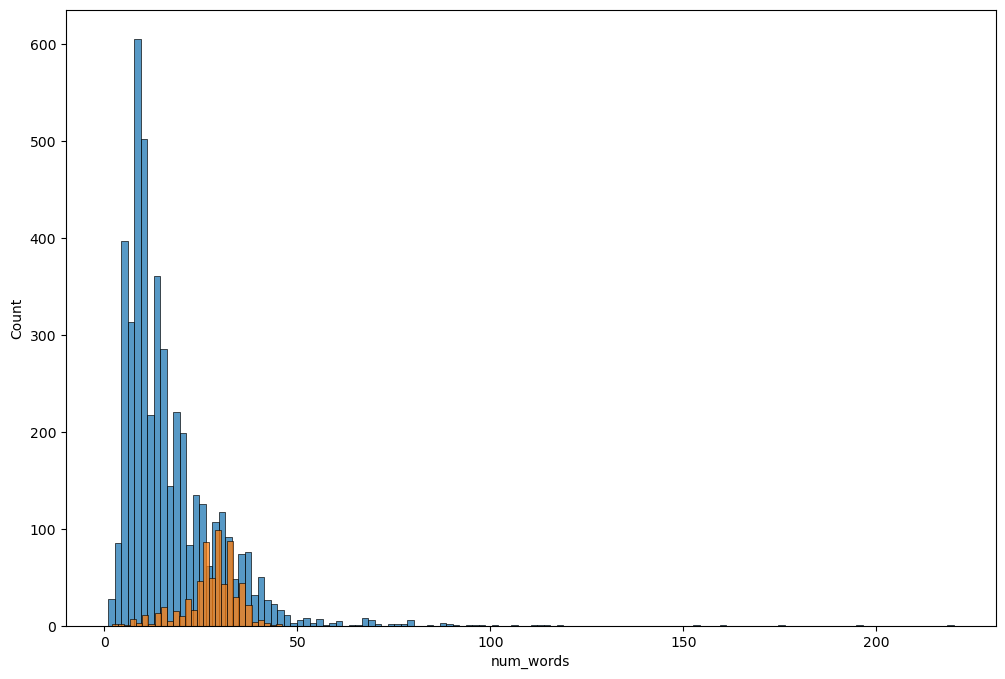

In [34]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'])

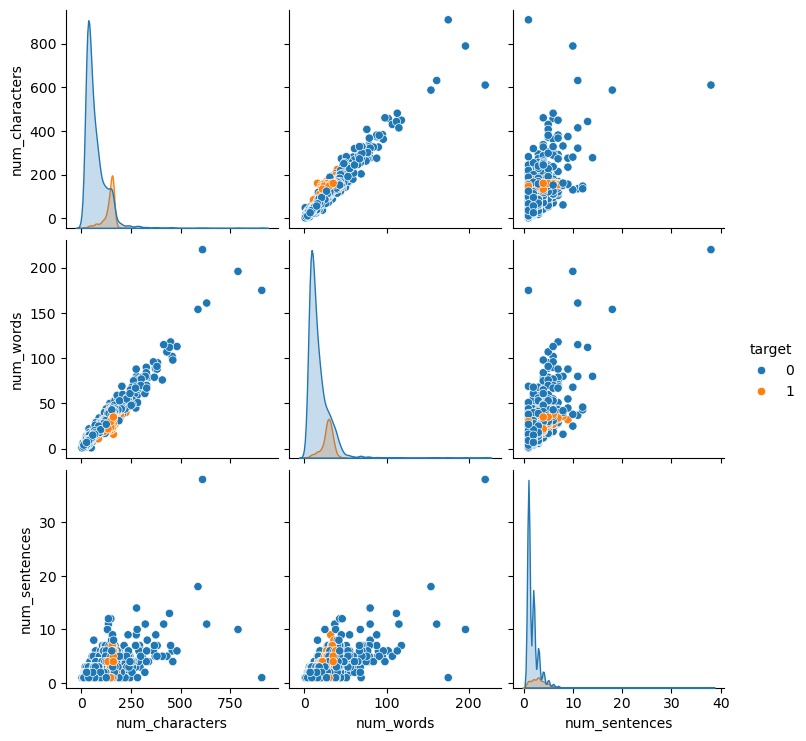

In [35]:
sns.pairplot(df,hue='target')

In [36]:
df_numeric = df.drop(columns='text')
df_numeric.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

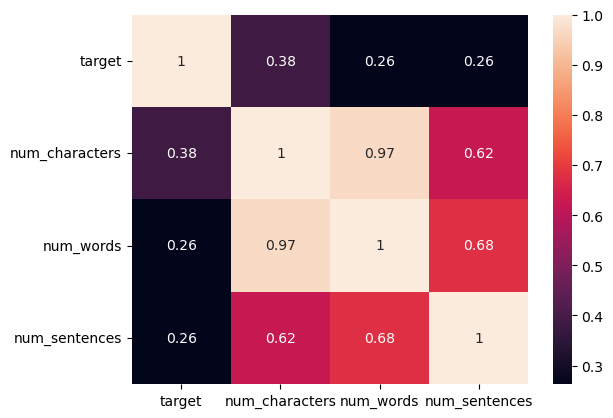

In [37]:
sns.heatmap(df_numeric.corr(),annot=True)

##
Data Preprocessing

In [39]:
import string
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps= PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y =[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and (i not in string.punctuation):
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        ps.stem(i)
        y.append(i)
    return " ".join(y)

In [40]:
transform_text('i am driving this car and i am going to fishing, are you gonna come? !%')

'driving car going fishing gon na come'

In [41]:
df['transformed_text']=df['text'].apply(transform_text)

In [42]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though


In [44]:
from wordcloud import WordCloud
wc =WordCloud(width = 500, height=500,min_font_size=10,background_color='white')

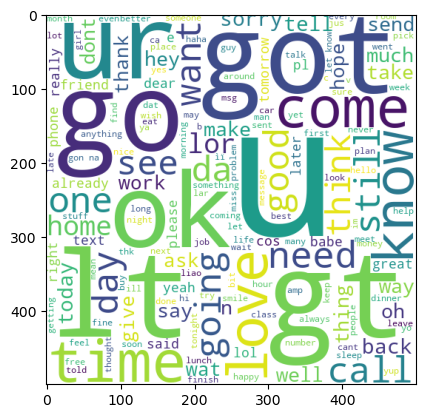

In [45]:
#ham wordcloud
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

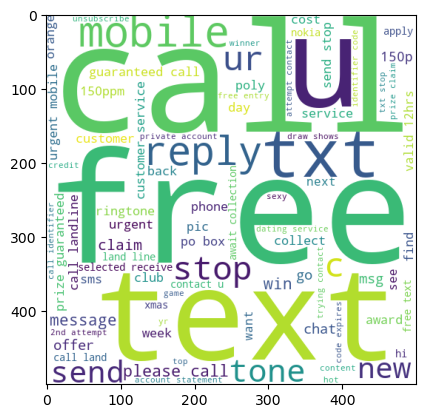

In [46]:
#spam wordcloud
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [47]:
spam_corpus=[]
for  text in df[df['target']==1]['transformed_text'].tolist():
    for word in text.split():
        spam_corpus.append(word)
        

In [48]:
len(spam_corpus)

9939

In [49]:
ham_corpus=[]
for  text in df[df['target']==0]['transformed_text'].tolist():
    for word in text.split():
        ham_corpus.append(word)
        

In [50]:
len(ham_corpus)

35404

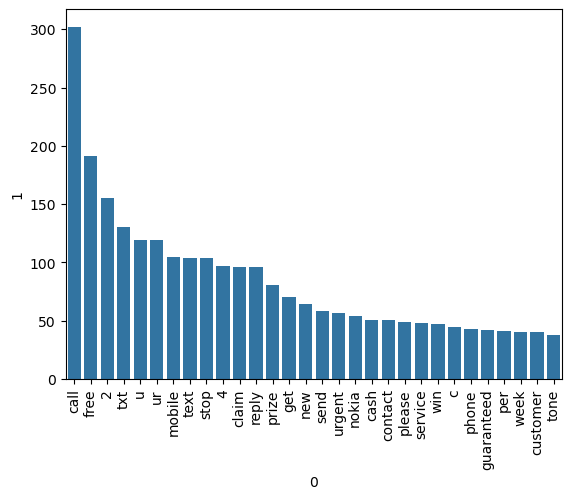

In [51]:
#top 10 words for spam texts
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

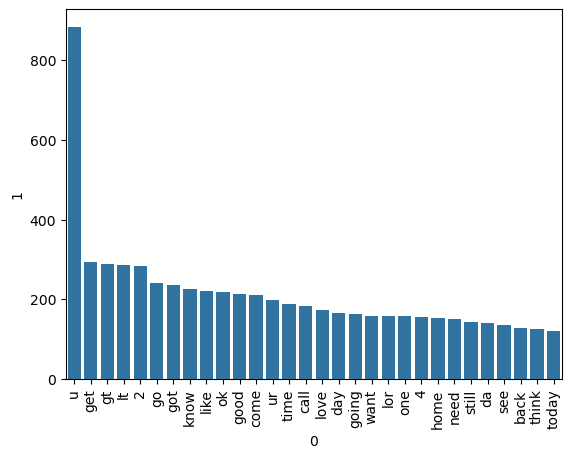

In [52]:
#top 10 words for ham texts
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [53]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [54]:
tfidf = TfidfVectorizer()
cv= CountVectorizer()

In [55]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [56]:
X.shape

(5169, 8002)

In [57]:
y = df['target'].values

In [58]:
y.shape

(5169,)

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [60]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [61]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [62]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.8762088974854932
0.5391705069124424
[[789 100]
 [ 28 117]]


In [63]:
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9642166344294004
0.9736842105263158
[[886   3]
 [ 34 111]]


In [64]:
mnb.fit(X_train,y_train)
y_pred3 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.960348162475822
1.0
[[889   0]
 [ 41 104]]


In [65]:
#we are going to stick to tfidf --> MNB

In [66]:
# We are gonna test now other classifier as well 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [67]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [68]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [69]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [70]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9534883720930233)

In [71]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print('For' , name)
    print('Accuracy :' , current_accuracy)
    print('Precision :', current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy : 0.9729206963249516
Precision : 0.9534883720930233
For KN
Accuracy : 0.8965183752417795
Precision : 1.0
For NB
Accuracy : 0.960348162475822
Precision : 1.0
For DT
Accuracy : 0.9332688588007737
Precision : 0.8114754098360656
For LR
Accuracy : 0.9410058027079303
Precision : 0.868421052631579
For RF
Accuracy : 0.9700193423597679
Precision : 0.9913793103448276


C:\Users\vigne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy : 0.9584139264990329
Precision : 0.9112903225806451
For BgC
Accuracy : 0.9516441005802708
Precision : 0.8321678321678322
For ETC
Accuracy : 0.9758220502901354
Precision : 1.0
For GBDT
Accuracy : 0.9535783365570599
Precision : 0.9008264462809917
For xgb
Accuracy : 0.971953578336557
Precision : 0.953125


In [72]:
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy' : accuracy_scores,
    'Precision' : precision_scores
}).sort_values('Precision', ascending=False)

performance_df

,Algorithm,Accuracy,Precision
1,KN,0.896518,1.000000
2,NB,0.960348,1.000000
8,ETC,0.975822,1.000000
5,RF,0.970019,0.991379
0,SVC,0.972921,0.953488
10,xgb,0.971954,0.953125
6,AdaBoost,0.958414,0.911290
9,GBDT,0.953578,0.900826
4,LR,0.941006,0.868421
7,BgC,0.951644,0.832168


In [75]:
#Model Improvement 
#Setting limit on max_features (Approach - 1 )
tfidf = TfidfVectorizer(max_features=3000)
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print('For' , name)
    print('Accuracy :' , current_accuracy)
    print('Precision :', current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

temp_df = pd.DataFrame({'Algorithm':list(clfs.keys()),'Accuracy_max_ft_3000' : accuracy_scores, 'Precision_max_ft_3000' : precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
new_df = performance_df.merge(temp_df, on ='Algorithm')
new_df

For SVC
Accuracy : 0.9729206963249516
Precision : 0.9534883720930233
For KN
Accuracy : 0.8965183752417795
Precision : 1.0
For NB
Accuracy : 0.960348162475822
Precision : 1.0
For DT
Accuracy : 0.9361702127659575
Precision : 0.8264462809917356
For LR
Accuracy : 0.9410058027079303
Precision : 0.868421052631579
For RF
Accuracy : 0.9700193423597679
Precision : 0.9913793103448276


C:\Users\vigne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy : 0.9584139264990329
Precision : 0.9112903225806451
For BgC
Accuracy : 0.9516441005802708
Precision : 0.8321678321678322
For ETC
Accuracy : 0.9758220502901354
Precision : 1.0
For GBDT
Accuracy : 0.9535783365570599
Precision : 0.9008264462809917
For xgb
Accuracy : 0.971953578336557
Precision : 0.953125


,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.896518,1.000000,0.896518,1.000000
1,NB,0.960348,1.000000,0.960348,1.000000
2,ETC,0.975822,1.000000,0.975822,1.000000
3,RF,0.970019,0.991379,0.970019,0.991379
4,SVC,0.972921,0.953488,0.972921,0.953488
5,xgb,0.971954,0.953125,0.971954,0.953125
6,AdaBoost,0.958414,0.911290,0.958414,0.911290
7,GBDT,0.953578,0.900826,0.953578,0.900826
8,LR,0.941006,0.868421,0.941006,0.868421
9,BgC,0.951644,0.832168,0.951644,0.832168


In [76]:
# Standardising X and implementing new col in input dataset (Approach - 2)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print('For' , name)
    print('Accuracy :' , current_accuracy)
    print('Precision :', current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

temp_df = pd.DataFrame({'Algorithm':list(clfs.keys()),'Accuracy_scaling' : accuracy_scores, 'Precision_scaling' : precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df_scaled = new_df.merge(temp_df, on ='Algorithm')
new_df_scaled

C:\Users\vigne\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For SVC
Accuracy : 0.8597678916827853
Precision : 0.0
For KN
Accuracy : 0.867504835589942
Precision : 0.7
For NB
Accuracy : 0.9535783365570599
Precision : 0.9532710280373832
For DT
Accuracy : 0.9313346228239845
Precision : 0.8083333333333333
For LR
Accuracy : 0.9642166344294004
Precision : 0.9285714285714286
For RF
Accuracy : 0.9661508704061895
Precision : 0.9910714285714286


C:\Users\vigne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy : 0.960348162475822
Precision : 0.9
For BgC
Accuracy : 0.9545454545454546
Precision : 0.85
For ETC
Accuracy : 0.9748549323017408
Precision : 1.0
For GBDT
Accuracy : 0.9468085106382979
Precision : 0.9090909090909091
For xgb
Accuracy : 0.9690522243713733
Precision : 0.9312977099236641


,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.896518,1.000000,0.896518,1.000000,0.867505,0.700000
1,NB,0.960348,1.000000,0.960348,1.000000,0.953578,0.953271
2,ETC,0.975822,1.000000,0.975822,1.000000,0.974855,1.000000
3,RF,0.970019,0.991379,0.970019,0.991379,0.966151,0.991071
4,SVC,0.972921,0.953488,0.972921,0.953488,0.859768,0.000000
5,xgb,0.971954,0.953125,0.971954,0.953125,0.969052,0.931298
6,AdaBoost,0.958414,0.911290,0.958414,0.911290,0.960348,0.900000
7,GBDT,0.953578,0.900826,0.953578,0.900826,0.946809,0.909091
8,LR,0.941006,0.868421,0.941006,0.868421,0.964217,0.928571
9,BgC,0.951644,0.832168,0.951644,0.832168,0.954545,0.850000


In [83]:
# Voting Classifier (Approach -3)
rfc = RandomForestClassifier(n_estimators=50, random_state=1)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=1)

from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(estimators = [('rfc',rfc),('nb',mnb),('etc',etc)], voting='soft')
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

voting_classifier.fit(X_train,y_train)
y_pred = voting_classifier.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 1.0


In [84]:
# Applying Stacking (Approach - 4)
estimators = [('rfc',rfc),('nb',mnb),('etc',etc)]
final_estimator = RandomForestClassifier()

from sklearn.ensemble import StackingClassifier

stck_clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stck_clf.fit(X_train,y_train)
y_pred = stck_clf.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))


Accuracy 0.9806576402321083
Precision 0.9432624113475178


In [87]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting_classifier,open('voting_classifier.pkl','wb'))

In [91]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [93]:
pickle.dump(mnb, open('MNB.pkl','wb'))